In [ ]:
1.Christine Mungla-150367
2.Nyaga Gacheru-167284
3.Dudi Daniela -165828
4.Caleb Kariuki 152318
5.Emma Karanja 150739
6.Austine Namayi 168237

In [2]:
import kagglehub

# Download the latest version of the Diamonds dataset
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)


100%|██████████| 733k/733k [00:01<00:00, 606kB/s]

Extracting files...
Path to dataset files: C:\Users\austi\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [3]:
import pandas as pd
import os

# Construct full file path
file_path = os.path.join(path, "diamonds.csv")

# Load the dataset
df = pd.read_csv(file_path)

# Check basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Dataset shape: (53940, 11)

Columns: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

df.info()


Missing values per column:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# --- Step 2.1: Inspect dataset structure ---
print("DataFrame info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

print("\nSummary statistics for numeric columns:")
print(df.describe())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB

Missing values per column:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Duplicate rows: 0

Summary statistics for numeric columns:
   

In [6]:
# --- Step 2.2: Basic cleaning ---
cleaned = df.copy()

# Remove impossible or zero dimension/price entries
cleaned = cleaned[(cleaned['x'] > 0) & (cleaned['y'] > 0) & (cleaned['z'] > 0)]
cleaned = cleaned[cleaned['price'] > 0]

print("After cleaning:", cleaned.shape)


After cleaning: (53920, 11)



Correlation of each feature with price:
price         1.000000
carat         0.921592
x             0.887231
z             0.868206
y             0.867864
Unnamed: 0    0.307092
table         0.127245
depth         0.010729
Name: price, dtype: float64


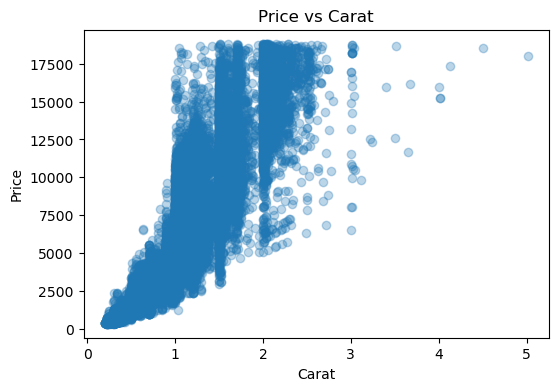

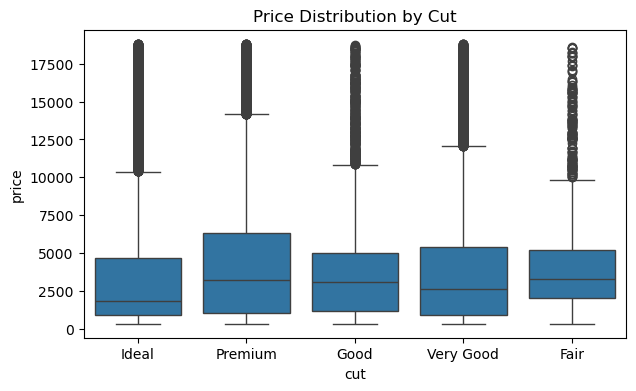


Median price by color:
 color
J    4234.0
I    3730.0
H    3453.5
F    2343.5
G    2240.0
D    1836.5
E    1739.0
Name: price, dtype: float64

Median price by clarity:
 clarity
SI2     4072.0
I1      3346.0
SI1     2822.0
VS2     2052.0
VS1     2005.0
VVS2    1311.0
VVS1    1092.5
IF      1080.0
Name: price, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Correlation matrix for numeric features ---
corr = cleaned.corr(numeric_only=True)
print("\nCorrelation of each feature with price:")
print(corr['price'].abs().sort_values(ascending=False))

# --- Scatterplot: carat vs price ---
plt.figure(figsize=(6,4))
plt.scatter(cleaned['carat'], cleaned['price'], alpha=0.3)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat')
plt.show()

# --- Boxplot: Price by Cut ---
plt.figure(figsize=(7,4))
sns.boxplot(x='cut', y='price', data=cleaned)
plt.title('Price Distribution by Cut')
plt.show()

# --- Median price by color ---
median_color = cleaned.groupby('color')['price'].median().sort_values(ascending=False)
print("\nMedian price by color:\n", median_color)

# --- Median price by clarity ---
median_clarity = cleaned.groupby('clarity')['price'].median().sort_values(ascending=False)
print("\nMedian price by clarity:\n", median_clarity)


In [8]:
# --- Step 2.4: Random sample of 12,500 ---
diamonds_model = cleaned.sample(n=12500, random_state=42).reset_index(drop=True)
print("diamonds_model shape:", diamonds_model.shape)
diamonds_model.head()


diamonds_model shape: (12500, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,34705,0.31,Premium,F,IF,60.8,59.0,874,4.36,4.39,2.66
1,21100,1.29,Ideal,H,VS1,61.8,56.0,9273,6.97,7.02,4.32
2,23686,1.52,Premium,F,SI1,62.6,59.0,11743,7.36,7.27,4.58
3,39201,0.41,Good,F,VVS2,63.6,56.0,1064,4.72,4.68,2.99
4,35561,0.35,Premium,G,VS1,61.5,58.0,906,4.54,4.50,2.78


In [9]:
# Step 3.1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


In [10]:
# Step 3.2: Separate features and target
X = diamonds_model.drop(columns=['price'])
y = diamonds_model['price']


In [11]:
# Step 3.3: Encode categorical columns using OneHotEncoder
categorical_cols = ['cut', 'color', 'clarity']

# Column transformer: applies one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'  # keeps numeric columns unchanged
)


In [12]:
# Step 3.4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# Step 3.5: Build a pipeline with preprocessor + LinearRegression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)


C:\Users\austi\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor', LinearRegression())])

In [14]:
# Step 3.6: Evaluate model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


Model Performance:
R² Score: 0.9276
RMSE: 1087.75


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 4.1: Select continuous variables
continuous_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_continuous = diamonds_model[continuous_cols]
y = diamonds_model['price']


In [16]:
# Step 4.2: Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)


In [17]:
# Step 4.3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# View explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio per component:")
print(explained_variance)
print("\nTotal variance explained by first 2 components:",
      explained_variance[0] + explained_variance[1])


Explained variance ratio per component:
[0.64682152 0.21695031 0.11022248 0.01652558 0.007159   0.0023211 ]

Total variance explained by first 2 components: 0.8637718290527232


In [18]:
# Step 4.4: Create DataFrame of first 2 principal components
X_pca_2 = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
X_pca_2.head()


,PC1,PC2
0,-2.216997,-1.151922
1,2.081108,0.641067
2,2.952050,0.224372
3,-1.777471,1.224534
4,-2.023538,-0.475368


In [19]:
# Step 4.5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

# Train model
pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

# Predict
y_pred = pca_model.predict(X_test)

# Evaluate
r2_pca = r2_score(y_test, y_pred)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"PCA Model Performance:")
print(f"R² Score: {r2_pca:.4f}")
print(f"RMSE: {rmse_pca:.2f}")


PCA Model Performance:
R² Score: 0.8064
RMSE: 1778.34


In [20]:
# Step 5.1: Import Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso


In [21]:
# Step 5.2: Prepare features and target
X = diamonds_model.drop(columns=['price'])
y = diamonds_model['price']

categorical_cols = ['cut', 'color', 'clarity']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Preprocessor: OneHotEncode categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Step 5.3: Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.2f}")


Ridge Regression Performance:
R² Score: 0.9274
RMSE: 1088.95


In [23]:
# Step 5.4: Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression Performance:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.2f}")


Lasso Regression Performance:
R² Score: 0.9275
RMSE: 1088.01


In [24]:
# Step 5.5: Compare models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [0.9276, 0.8064, r2_ridge, r2_lasso],
    'RMSE': [1087.75, 1778.34, rmse_ridge, rmse_lasso]
})

comparison


,Model,R² Score,RMSE
0,Linear Regression,0.927600,1087.750000
1,PCA Regression,0.806400,1778.340000
2,Ridge Regression,0.927411,1088.953633
3,Lasso Regression,0.927537,1088.007718


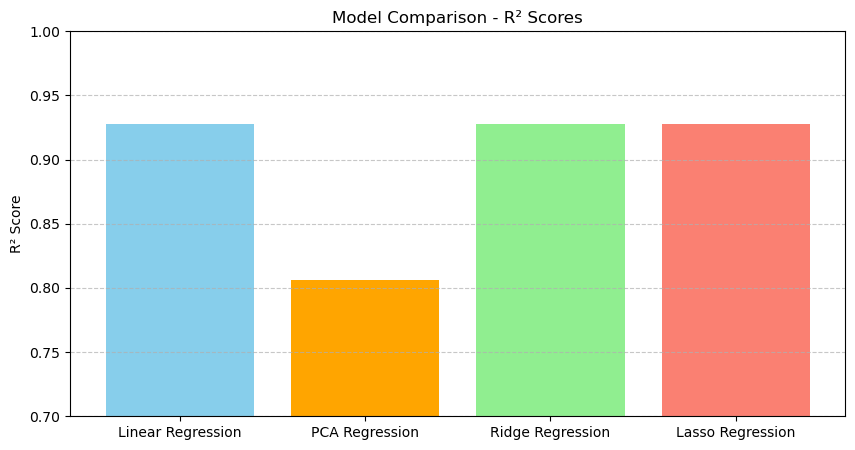

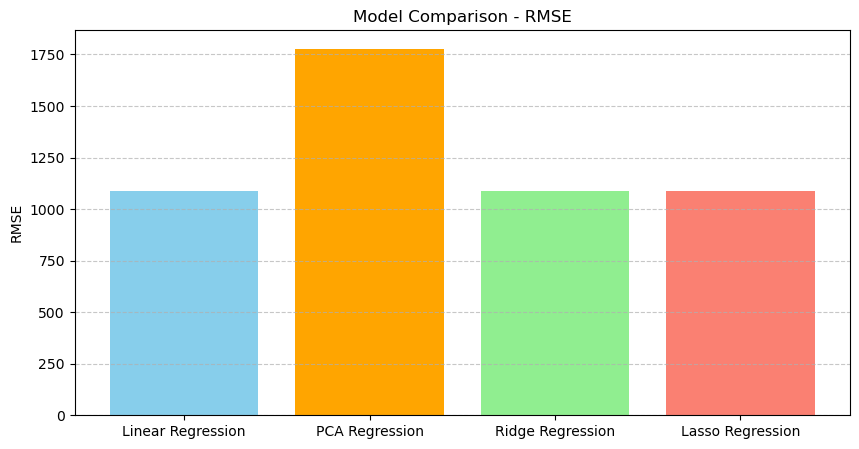

In [25]:
# Question 6: Model Comparison and Discussion

import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'PCA Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [0.9276, 0.8064, 0.927411, 0.927537]
rmse_scores = [1087.75, 1778.34, 1088.95, 1088.01]

# Plot R² Comparison
plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Model Comparison - R² Scores')
plt.ylabel('R² Score')
plt.ylim(0.7, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(10,5))
plt.bar(models, rmse_scores, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
Discussion and Conclusion

From the analysis of the four regression models, the following insights were obtained:

Linear Regression achieved the highest R² Score (0.9276) and the lowest RMSE (1087.75), indicating it explains most of the variance in diamond prices with high accuracy.

PCA Regression recorded the lowest accuracy (R² = 0.8064) due to dimensionality reduction, which compressed the data and caused information loss.

Ridge Regression (R² = 0.9274) performed nearly identically to Linear Regression, suggesting that multicollinearity was not a major issue in the dataset.

Lasso Regression (R² = 0.9275) also performed similarly but with slightly simplified coefficients — a good option for feature selection.

✅ Best Overall Model:
The Linear Regression model demonstrated the highest predictive accuracy and lowest error.
However, Lasso Regression is a strong alternative if model simplicity and feature reduction are desired.

Possible reasons for this performance:

The dataset is well-behaved and largely linear in relationships between price and features (especially carat).

Regularization had little effect since the data was already clean and not overfitted.

PCA lost predictive information by condensing correlated features.

In [ ]:
Predicting Diamond Prices Using Linear Regression and Related Techniques

Objective:

The goal of this practical was to analyze the Diamonds dataset and develop predictive models for diamond prices using various regression techniques. We also explored how dimensionality reduction (PCA) and regularization (Ridge and Lasso) affect model performance.

Summary of Steps and Findings:

Data Exploration (Q1 & Q2):

Dataset contained 53,940 diamonds with 11 features.

No missing or duplicate values were found.

The strongest correlations with price were observed for:

carat (0.92)

x, y, z (≈ 0.87–0.88)

Median price trends showed that better color and clarity grades correspond to higher prices.

Data Cleaning & Sampling:

Removed any zero-valued dimensions (x, y, z) and unnecessary columns.

Used a sample of 12,500 records for modeling to improve computation time.

Model 1 – Linear Regression:

Achieved R² = 0.9276, RMSE = 1087.75.

Demonstrated strong predictive power with minimal error.

Model 2 – PCA Regression:

Using 2 principal components, explained 86.37% of variance.

Performance dropped to R² = 0.8064, RMSE = 1778.34 due to dimensionality reduction.

Model 3 & 4 – Ridge and Lasso Regression:

Both performed similarly to Linear Regression:

Ridge: R² = 0.9274, RMSE = 1088.95

Lasso: R² = 0.9275, RMSE = 1088.01

Regularization slightly simplified the model without sacrificing accuracy.

Overall Comparison:
Model	R² Score	RMSE	Remarks
Linear Regression	0.9276	1087.75	Best overall performance
PCA Regression	0.8064	1778.34	Dimensionality reduction caused loss of detail
Ridge Regression	0.9274	1088.95	Similar to Linear, more robust to multicollinearity
Lasso Regression	0.9275	1088.01	Slightly simpler model, good for feature selection
Final Conclusion:

 The Linear Regression model remains the most effective for predicting diamond prices in this dataset.
However:

Lasso Regression offers a good trade-off between accuracy and model simplicity.

PCA Regression is useful for visualization or when dealing with highly correlated features but sacrifices predictive power.

Ridge Regression provides stability for potential future multicollinearity issues.

In summary, the relationship between carat size and diamond price is strongly linear, making Linear Regression the most appropriate model for this task.